# **NLP Project - Resume Screening Project** 

**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset into dataframe and displaying the first 5 rows in it.

In [3]:
df = pd.read_csv('/kaggle/input/resume-dataset/ResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# **# Data Exploration**

* Checking if the dataset has any null values or not

In [4]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

* Finding basic information about the dataset
  * It has 962 rows and 2 columns
  * Both the columns contains data of Object datatype i.e. string

In [5]:
print(df.shape)
print(df.info())

(962, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


* Looking at the Unique Categories

In [6]:
unique_categories = df['Category'].unique()
print(unique_categories)

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


* Exploring Categories - getting value counts of each category.

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

# **#Data Visualization**

# Creating a count plot of Categories
Creating a bar chart visualization using Plotly to display the count of job categories from a DataFrame (df).

plot_data = pd.DataFrame({
    'Category': df['Category'].value_counts().index,
    'Count': df['Category'].value_counts().values
})
This code creates a new DataFrame named plot_data to store the data that will be used for plotting. It is constructed using a Python dictionary with two keys: 'Category' and 'Count'. The 'Category' key contains unique job categories extracted from the 'Category' column, and the 'Count' key contains the corresponding count of each category.
fig = px.bar(plot_data, x='Category', y='Count',
             color='Category', 
             labels={'Category': 'Job', 'Count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)
A bar chart is created using Plotly Express (px). The plot_data DataFrame is used as the data source for the plot. The 'Category' column values are plotted on the x-axis, and the 'Count' column values are plotted on the y-axis.

It sets the color of the bars based on the 'Category' column values, which means each job category will have a different color in the chart.

It sets the color palette to be used in the plot. It uses the qualitative color sequence 'Set3' from Plotly's predefined color palettes.

In [9]:
# Creating the bar plot
import plotly.express as px
import plotly.graph_objects as go
# Create a new DataFrame for plotting
plot_data = pd.DataFrame({
    'Category': df['Category'].value_counts().index,
    'Count': df['Category'].value_counts().values
})
plot_data.head()
fig = px.bar(plot_data, x='Category', y='Count',
             color='Category', 
             labels={'Category': 'Job', 'Count': 'Count'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    title='Count of a particular Job',
    xaxis_title='Job Type',
    yaxis_title='Count',
    legend_title='Job Categories',
    showlegend=True,
    xaxis=dict(tickangle=-30),
    font=dict(family='Times New Roman', size=12),
    plot_bgcolor='white'
)

fig.show()

**#Pie plot of Job Category**

fig = px.pie(plot_data, values='Count', names='Category',
             title='Pie plot of Job Category',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.4,
             labels={'Category': 'Categories', 'Count': 'Count'},
             opacity=0.8,
             )
Creates a pie chart using Plotly Express (px). The plot_data DataFrame serves as the data source for the pie chart. It specifies that the 'Count' column contains the values to be used for the size of the pie slices, and the 'Category' column contains the names for each slice.

In [10]:
fig = px.pie(plot_data, values='Count', names='Category',
             title='Pie plot of Job Category',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.4,
             labels={'Category': 'Categories', 'Count': 'Count'},
             opacity=0.8,
             )

# Customize the layout
fig.update_layout(
    legend_title='Categories',
    font=dict(family='Times New Roman', size=16, color='black'),
    plot_bgcolor='white',
    margin=dict(t=50, b=50, l=50, r=50)
)

fig.show()

# #Data Processing

In [11]:
# Preprocessing libraries
import re
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
import string
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**#Cleaning Data:**

1 Removing (URLs, hashtags, mentions, special letters, punctuations)

2 Tokenizing the cleaned text

3 Removing Stop Words

4 Performing Lemmatization on final text

The resumeKeywords function removes URLs, hashtags, mentions, special characters, non-ASCII characters, multiple spaces, and stop words from the input text while also performing tokenization, lowercasing, and lemmatization to provide cleaned and processed text as output.

Tokenization: Tokenization is the process of breaking a text into individual words or tokens. In this step, the text is split into its constituent words, which makes it easier to analyze and process. For example, the sentence "I love coding" would be tokenized into three tokens: "I," "love," and "coding."

StopWords: Stopwords are common words that are typically removed from text during natural language processing to improve text analysis and reduce noise in the data.Examples of common stopwords in English include "the," "and," "in," "is," "of," "it," "to," and many others. Removing stopwords from text helps reduce the dimensionality of the data and focuses the analysis on more meaningful words

Lemmatization: Lemmatization is the process of reducing words to their base or root form. This step is essential for text analysis because it reduces different forms of a word to a common base form. For example, the words "running" and "ran" would both be lemmatized to "run." This simplifies the text and ensures that similar words are treated as the same, which is crucial for accurate analysis and modeling.

In [12]:
def resumeKeywords(txt):   # sourcery skip: avoid-builtin-shadow, list-comprehension
    cleanText = re.sub('http\S+\s', ' ', txt) # Removing URLs
    cleanText = re.sub('#\S+\s', ' ', cleanText) # Removing hashtags
    cleanText = re.sub('@\S+', '  ', cleanText)  # Removing mentions
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) # Removing punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) # Removing non-ASCII characters
    cleanText = re.sub('\s+', ' ', cleanText) # Replace multiple spaces with a single space
    cleanText = cleanText.strip() # Removing leading and trailing whitespaces
    
    #------------Tokenizing Cleaned Text--------------------------------------------------------
    # Tokenizing our cleaned text
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(cleanText)
    # Now lower everything and storing it in new variable words
    words = []
    for word in tokens:
        words.append(word.lower())
    #--------------------------------------------------------------------------------------------

    #-------------Removing Stop Words------------------------------------------------------------
    stopwords = nltk.corpus.stopwords.words('english')
    words_new = []
    for word in words:
        if word not in stopwords:
            words_new.append(word)
    #--------------------------------------------------------------------------------------------
    #-----------Performing Lemmatization---------------------------------------------------------
    wn = WordNetLemmatizer() 
    lemm_text = [wn.lemmatize(word) for word in words_new]
    #--------------------------------------------------------------------------------------------
    #----------Converting List into String-------------------------------------------------------
    processed_text = ' '.join(lemm_text)
    
    return processed_text

**- Testing the above custom function to remove certain details from Resume**

In [13]:
resumeKeywords(" https://www.github.com Software Engineer with 2 years of experience in Data Structures and Algorithms Agile Scrum, SDLC, C++, Java MVC, JavaScript, Web Development, Python " +
               "Data Science, Machine Learning / AI, and Mainframe technologies Programming Languages: 	C/C++, Java, Python, SQL, JCL, Cobol, DB2" + 
               "Frameworks: %#####	Java Spring, Spring boot, React, Angular, NodeJs" +
               "Tools: 	GIT, Visual Studio Code, Sublime, Spyder, Jupyter Notebook, Bluezone, Netbeans, Jira, Confluence, Kanban, CI/CD (Jenkins, GitLab, Azure-Devops), AWS," + 
               "Data-Bricks Libraries: 	NumPy, Pandas, Matplotlib, nltk, Scikit learn, TensorFlow, Keras Other: 	Problem-Solving, Quick Learner, Time-Management")

'software engineer 2 year experience data structure algorithm agile scrum sdlc c java mvc javascript web development python data science machine learning ai mainframe technology programming language c c java python sql jcl cobol db2frameworks java spring spring boot react angular nodejstools git visual studio code sublime spyder jupyter notebook bluezone netbeans jira confluence kanban ci cd jenkins gitlab azure devops aws data brick library numpy panda matplotlib nltk scikit learn tensorflow kera problem solving quick learner time management'

**#Applying above created Custom Function to process the data and creating new column "Processed_Resume"**

In [14]:
df['Processed_Resume'] = df['Resume'].apply(lambda x: resumeKeywords(x))
df.head()

,Category,Resume,Processed_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


**#Generating WordCloud from the cleaned text**

In [15]:
!pip install wordcloud
from wordcloud import WordCloud

In [16]:
# Join the cleaned text into a single string
text = ' '.join(df['Processed_Resume'])

# Create a word cloud
wordcloud = WordCloud(background_color='white',
                      width=800,
                      height=600,
                      max_words=100,
                      colormap='viridis'
                      ).generate(text)

# Convert word cloud to an image
wordcloud_image = wordcloud.to_image()

# Display the word cloud using Plotly as an image
fig = px.imshow(wordcloud_image)
fig.update_layout(
    title='Word Cloud of Cleaned Text',
    xaxis_showticklabels=False,
    yaxis_showticklabels=False,
    plot_bgcolor='white'
)
fig.show()

**#Encoding the Category column and plotting it**

In [17]:
# Label encoding our Category
label = LabelEncoder()
df['Encoded_Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,Processed_Resume,Encoded_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may 2013 may 2017 b e uit rgp...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...,6


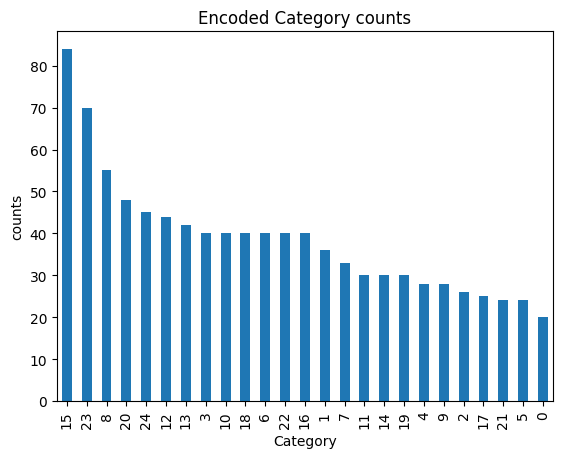

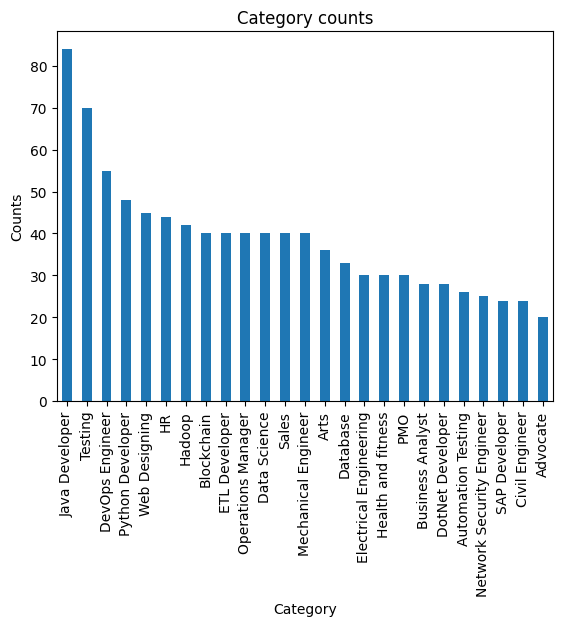

In [18]:
# Creating the bar plot
df['Encoded_Category'].value_counts().plot(kind = 'bar', title='Encoded Category counts', xlabel='Category', ylabel='counts')
plt.show()
df['Category'].value_counts().plot(kind = 'bar', title='Category counts', xlabel='Category', ylabel='Counts')
plt.show()

In [19]:
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

**#Vectorization (using TfidfVectorizer)**

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Processed_Resume'])
requiredText  = tfidf.transform(df['Processed_Resume'])
print(requiredText)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 155341 stored elements and shape (962, 6562)>
  Coords	Values
  (0, 6548)	0.0796974603078024
  (0, 6537)	0.013062480866056986
  (0, 6489)	0.01598069156289656
  (0, 6485)	0.04632697838273315
  (0, 6484)	0.12388158371556562
  (0, 6355)	0.07006909194186212
  (0, 6344)	0.032825773010886516
  (0, 6283)	0.03644830661863624
  (0, 6267)	0.015414830123245859
  (0, 6248)	0.04632697838273315
  (0, 6224)	0.014826027158545772
  (0, 6222)	0.04978030320328149
  (0, 6220)	0.018883664761034213
  (0, 6215)	0.026288088733853982
  (0, 6192)	0.04197750505677255
  (0, 6169)	0.02156454127026071
  (0, 6168)	0.023320710093874923
  (0, 6088)	0.04632697838273315
  (0, 6070)	0.034417543058800563
  (0, 6002)	0.17853857112282104
  (0, 6001)	0.11777560177430524
  (0, 5964)	0.03318686880218766
  (0, 5909)	0.04632697838273315
  (0, 5905)	0.11542901278343008
  (0, 5894)	0.028583157111761827
  :	:
  (961, 1483)	0.038219738034296194
  (961, 1475)	0.04933547311

# #Model Creation
**#Splitting into Train and Test using (Vectorized text & Encoded category)**

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Encoded_Category'], test_size=0.25, random_state=42)
print(X_train.shape)

print(X_test.shape)

(721, 6562)
(241, 6562)


**#Training the baseline model and printing its Accuracy**

* KNeighbors Classifier
* Multinomial NB


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred1)*100, ' % \n')
print(classification_report(y_test, y_pred1))

Accuracy:  94.1908713692946  % 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         8
           2       1.00      0.83      0.91         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         9
           8       1.00      0.88      0.94        17
           9       1.00      0.30      0.46        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      0.93      0.97        15
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       0.66      1.00      0.79        21
          16       1.00      1.00      1.00     

In [23]:
knc = OneVsRestClassifier(KNeighborsClassifier())
knc.fit(X_train,y_train)
y_pred2 = knc.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred2)*100, ' %')
print(classification_report(y_test, y_pred2))

Accuracy:  98.3402489626556  %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         9
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         9
           8       1.00      0.88      0.94        17
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00        10
          15       1.00      1.00      1.00        21
          16       1.00      1.00      1.00       

**#Training the advanced model and printing its Accuracy**

RNN

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the maximum number of words to consider
max_words = 5000

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(df['Processed_Resume'])
X = tokenizer.texts_to_sequences(df['Processed_Resume'])
X = pad_sequences(X, maxlen=100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Encoded_Category'], test_size=0.25, random_state=42)

# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

# Evaluate the RNN model
# y_pred3 = model.predict(X_test)
y_pred_rnn_prob = model.predict(X_test)
y_pred3 = y_pred_rnn_prob.argmax(axis=-1)
accuracy_rnn = accuracy_score(y_test, y_pred3)
print('RNN Model Accuracy: {:.2f}%'.format(accuracy_rnn * 100))
print(classification_report(y_test, y_pred3))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.

2026-01-10 06:11:02.563779: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.1257 - loss: 3.2098 - val_accuracy: 0.3527 - val_loss: 3.1618
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.3059 - loss: 3.0928 - val_accuracy: 0.2407 - val_loss: 2.7566
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.3596 - loss: 2.6232 - val_accuracy: 0.2946 - val_loss: 2.6122
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step - accuracy: 0.3455 - loss: 2.4633 - val_accuracy: 0.4274 - val_loss: 2.3759
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.5995 - loss: 2.2383 - val_accuracy: 0.4606 - val_loss: 2.0798
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5714 - loss: 1.8646 - val_accuracy: 0.5560 - val_loss: 1.7489
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.6729 - loss: 1.5697 - val_accuracy: 0.6639 - val_loss: 1.3721
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.7509 - loss: 1.2079 - val_accuracy: 0.7427 - val_

# Prediction System
**Saving the created models**

In [27]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(knc, open('knc.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))
pickle.dump(model, open('rnn.pkl', 'wb'))

In [28]:
resume_1 = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

**Predicting Resume-1 by KNearestClassifier model**

In [29]:
import pickle

# Load the trained KNearest classifier model
clf = pickle.load(open('knc.pkl', 'rb'))

# Clean the input resume
cleaned_resume = resumeKeywords(resume_1)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


**Predicting Resume-1 by Multinomial Naive Bayes model**

In [30]:

import pickle

# Load the trained  Multinomial Naive Bayes model
mnb = pickle.load(open('mnb.pkl', 'rb'))

# Clean the input resume
cleaned_resume = resumeKeywords(resume_1)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = mnb.predict(input_features)[0]

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6


**Predicting Resume-1 by RNN model**

In [31]:
import pickle
rnn = pickle.load(open('rnn.pkl', 'rb'))
# Define the maximum number of words to consider
max_words = 5000

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(df['Processed_Resume'])  # Use the same tokenizer used for training
cleaned_resume = resumeKeywords(resume_1)  # Clean the input resume

# Tokenize the cleaned input resume
input_sequence = tokenizer.texts_to_sequences([cleaned_resume])

input_sequence = pad_sequences(input_sequence, maxlen=100)

# Make the prediction using the loaded RNN model
predicted_probabilities = rnn.predict(input_sequence)

predictioon_id = np.argmax(predicted_probabilities)
# Map the category ID to the category name using category_mapping
category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print("Predicted Category ID:", prediction_id)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Predicted Category: Data Science
Predicted Category ID: 6
